<a href="https://colab.research.google.com/github/shahiryar/Multi-armed-Bandit/blob/master/Upper_Bound_Confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Simulation Data
- Three Options each with an underlying normal reward distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
opt_A = np.random.normal(loc=100, scale=3, size=1000)
opt_B = np.random.normal(loc=30, scale=4, size=1000)
opt_C = np.random.normal(loc= 80, scale=4, size=1000)

<Axes: ylabel='Density'>

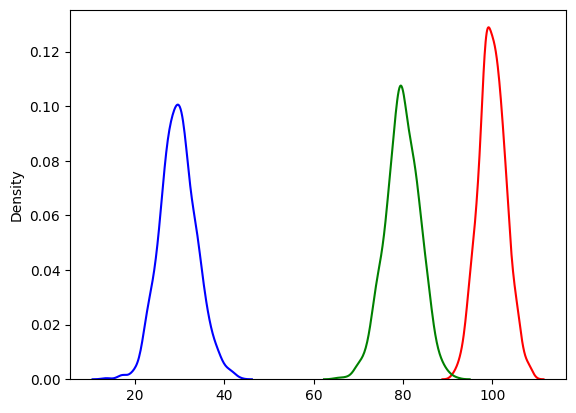

In [ ]:
sns.kdeplot(opt_A, color='red')
sns.kdeplot(opt_B, color='blue')
sns.kdeplot(opt_C, color='green')

<Axes: >

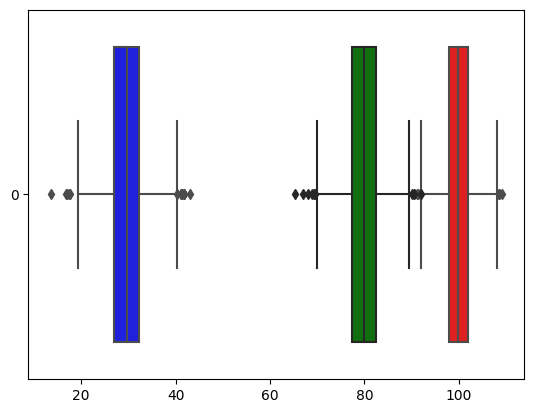

In [ ]:
sns.boxplot(data=opt_A, orient='h', color='red')
sns.boxplot(data=opt_B, orient='h', color='blue')
sns.boxplot(data=opt_C, orient='h', color='green')

# Upper Confidence Bound 
to demonstrate the process of selecting an option without actually knowing each of the underlying distritbutions

In [ ]:
import random

def chance(percent=20):
    return random.random() < percent/100


In [ ]:
def cal_confidence(Ni, i):
  # i = total number of iterations
  # Ni = iternation of the option in question
  return np.sqrt((3*np.log(Ni))/(2*i))

In [ ]:
def reward(opt):
    if opt=='A': return np.random.normal(loc=99, scale=3, size=1)[0]
    if opt=='B': return np.random.normal(loc=100, scale=4, size=1)[0]
    if opt=='C': return np.random.normal(loc= 85, scale=4, size=1)[0]
    return None

In [ ]:
confidence_A, confidence_B, confidence_C = 0,0,0

N = 100

Ni_A,Ni_B,Ni_C = 1,1,1

r_A, r_B, r_C = reward("A"), reward("B"), reward("C")

mean_A, mean_B, mean_C = r_A, r_B, r_C

logs = []

for i in range(1, N+1):
  log_Ni = i
  #which option has largest upper confidence
  #calculate confidence
  confidence_A = cal_confidence(Ni_A, i)
  confidence_B = cal_confidence(Ni_B, i)
  confidence_C = cal_confidence(Ni_C, i)

  #calculate mean
  mean_A = r_A/Ni_A
  mean_B = r_B/Ni_B
  mean_C = r_C/Ni_C

  #calculate upper confidence and select option with the higest upper confidence
  higest_UBC= np.argmax([(mean_A+ confidence_A), (mean_B+ confidence_B), (mean_C+ confidence_C)])

  #take a chance to select a random exploration option
  if chance(): higest_UBC = random.choice([c for c in [0,1,2] if c!=higest_UBC])

  if higest_UBC==0: 
    _r = reward("A")
    Ni_A += 1
    r_A+=_r

    logs.append([log_Ni, 'A', _r])
    logs.append([log_Ni, 'B', mean_B])
    logs.append([log_Ni, 'C', mean_C])

  elif higest_UBC == 1:
    _r = reward("B")
    log_reward = _r
    Ni_B += 1
    r_B+=_r

    logs.append([log_Ni, 'A', mean_A])
    logs.append([log_Ni, 'B', _r])
    logs.append([log_Ni, 'C', mean_C])
  elif higest_UBC == 2:

    _r = reward("C")
    log_reward = _r
    Ni_C += 1
    r_C+=_r

    logs.append([log_Ni, 'A', mean_A])
    logs.append([log_Ni, 'B', mean_B])
    logs.append([log_Ni, 'C', _r])
  else:
    print(higest_UBC)
    break




In [ ]:
_max = np.argmax([r_A, r_B, r_C])
if _max == 0: print("A is optimal")
if _max == 1: print("B is optimal")
if _max == 2: print ("D is optimal")

A is optimal


In [ ]:
logs = np.array(logs)

In [ ]:
logs_A = logs[np.where(logs.T[1] == 'A')].T[2]
logs_A = [logs_A[:i] for i in range(1, len(logs_A)+1)]

logs_B = logs[np.where(logs.T[1] == 'B')].T[2]
logs_B = [logs_B[:i] for i in range(1, len(logs_B)+1)]

logs_C = logs[np.where(logs.T[1] == 'C')].T[2]
logs_C = [logs_C[:i] for i in range(1, len(logs_C)+1)]


In [ ]:
N = len(logs_A)
df_log_A = pd.DataFrame(data={'Ni': [i for i in range(1, N+1)], 'Reward': logs_A,'Option': ['A' for i in range(1, N+1)]})
df_log_A = df_log_A.explode('Reward')

df_log_B = pd.DataFrame(data={'Ni': [i for i in range(1, N+1)], 'Reward': logs_B,'Option': ['B' for i in range(1, N+1)]})
df_log_B = df_log_B.explode('Reward')

df_log_C = pd.DataFrame(data={'Ni': [i for i in range(1, N+1)], 'Reward': logs_C,'Option': ['c' for i in range(1, N+1)]})
df_log_C = df_log_C.explode('Reward')

In [ ]:
df_logs = pd.concat([df_log_A, df_log_B, df_log_C])

In [ ]:
df_logs.head()

,Ni,Reward,Option
0,1,100.31402876048851,A
1,2,100.31402876048851,A
1,2,99.20242555954098,A
2,3,100.31402876048851,A
2,3,99.20242555954098,A


In [ ]:
df_logs.sort_values('Ni', inplace=True)
df_logs.reset_index(inplace=True)

In [ ]:
df_logs.Reward

0        100.31402876048851
1          92.6683940161788
2         80.97024614460845
3        100.31402876048851
4         99.20242555954098
                ...        
15145     96.92531447717906
15146    105.73976569864158
15147     99.93412309805615
15148      85.3402205275643
15149      85.3402205275643
Name: Reward, Length: 15150, dtype: object

The graph below shows how the algorithm moves through various exploration and exploitation steps over time and finally settles down on one of the options.

In [ ]:
import plotly.express as px
fig = px.box(df_logs, x='Reward', color='Option', animation_frame='Ni', facet_col='Option')
# Set the x-axis range
#fig.update_xaxes(range=[float(df_logs.Reward.min())*1.5, float(df_logs.Reward.max())*1.5])

fig.show()